# global imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import string
import math
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d

# global initializations

In [2]:
COLUMNS = {
    "envId": {
        "type": "generated-string"
    },
    "OS":{
        "type": "array",
        "values": ["Windows", "Linux", "MacOS" ]
    },
    "OS Version":{
        "type": "dependent",
        "depends-by": "OS",
        "depend-map": {
            "Windows":{
                "type": "array",
                "values": [ "7", "8", "10", "2018", "2019" ]
            }, 
            "Linux":{
                "type": "array",
                "values": [ "redhat 7.1", "Ubuntu 10", "Sles6", "Redhat 7", "CentOS 15" ]
            },
            "MacOS":{
                "type": "array",
                "values": [ "10", "11", "12", "13", "15" ]
            },
        } 
    },
    "RAM": {
        "type": "number",
        "mult" : 1000
    },
    "CPU": {
        "type": "number",
        "mult": 20
    },
    "Hard Disk space":{
        "type": "number",
        "mult": 1000
    },
    "Software installed":{
        "type": "array",
        "values":["DWC","MDM","DB2", "Liberty", "DDM"]
    },
    "Version release":{
        "type": "dependent",
        "depends-by": "Software installed",
        "depend-map": {
            "DWC":{
                "type": "array",
                "values": [ "9.0", "9.1", "9.2", "9.3", "9.4", "9.5" ]
            }, 
            "MDM":{
                "type": "array",
                "values": [ "9.0", "9.1", "9.2", "9.3", "9.4", "9.5" ]
            },
            "DB2":{
                "type": "array",
                "values": [ "10", "11", "12"]
            },
            "Liberty":{
                "type": "array",
                "values": [ "10", "11", "12" ]
            },
            "DDM":{
                "type": "array",
                "values": [ "9.0", "9.1", "9.2", "9.3", "9.4", "9.5" ]
            }
        } 
    },
    "Version fixpack":{
        "type": "dependent",
        "depends-by": "Software installed && Version release",
        "depend-map": {
            "DWC":{
                "9.0":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.1":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.2":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.3":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.4":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.5":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                }
            }, 
            "MDM":{
                "9.0":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.1":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.2":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.3":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.4":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.5":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                }
            },
            "DB2":{
                "10":{
                    "type": "array",
                    "values": ["ga", "fp1"]
                },
                "11":{
                    "type": "array",
                    "values": ["ga", "fp1"]
                },
                "12":{
                    "type": "array",
                    "values": ["ga", "fp1"]
                }
            },
            "Liberty":{
                "10":{
                    "type": "array",
                    "values": ["ga"]
                },
                "11":{
                    "type": "array",
                    "values": ["ga"]
                },
                "12":{
                    "type": "array",
                    "values": ["ga"]
                }
            },
            "DDM":{
                "9.0":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.1":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.2":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.3":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.4":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                },
                "9.5":{
                    "type": "array",
                    "values": ["ga", "fp1", "fp2", "fp3", "fp4"]
                }
            }
        } 
    },
    "Check":{
        "type": "boolean"
    }

}

PREPROCESSED_COLUMNS = {
    "envId":{
        "type": "direct-value",
        "reference": "envId"
    },
    "OS": {
        "type": "ohe",
        "reference": "OS && OS Version"
    },
    "RAM": {
        "type": "direct-value",
        "reference": "RAM"
    },
    "CPU": {
        "type": "direct-value",
        "reference": "CPU"
    },
    "Hard Disk space": {
        "type": "direct-value",
        "reference": "Hard Disk space"
    },
    "Software installed": {
        "type": "ohe",
        "reference": "Software installed && Version release && Version fixpack"
    },
    "Check":{
        "type": "direct-value",
        "reference": "Check"
    }
    
}

N_ROWS = 1000
ENVID_SIZE=[2,1]


# data generation

In [3]:
class ExcelFileGenerator:
    
    def __init__(self, filename, template):
        self.filename = filename
        self.template = template
        self.dataframe = None
        
    def envIdGenerator(self, n_letters, n_numbers):
        envId = ""
        for i in range(n_letters):
            envId += random.choice(string.ascii_letters)
        for i in range(n_letters):
            envId += str(int(random.random() * 9))
        return envId
    
    def createGeneratedStringField(self):
        return self.envIdGenerator(ENVID_SIZE[0], ENVID_SIZE[1])
    
    def createArrayField(self, values):
        i = math.floor(random.random() * len(values))
        return values[i]
    
    def createNumberField(self, mult):
        return math.floor( random.random() * mult )
    
    def createBooleanField(self ):
            return random.random() > 0.5
    
    def createDependentField(self, field, createdFields):
        dependencies = field["depends-by"].split(" && ")
        determinatedField = field["depend-map"]
        for dependency in dependencies:
            determinatedField = determinatedField[createdFields[dependency]]
        return self.createField(determinatedField, createdFields)
        
    def createField(self, field, createdFields):
        if ( field["type"] == "generated-string" ):
            return self.createGeneratedStringField()
        elif ( field["type"] == "array" ):
            return self.createArrayField( field["values"] )
        elif ( field["type"] == "number" ):
            return self.createNumberField( field["mult"] )
        elif ( field["type"] == "dependent" ):
            return self.createDependentField( field, createdFields )
        elif ( field["type"] == "boolean" ):
            return self.createBooleanField()
        return None
    
    def populateDataFrame(self, n_items):
        self.dataframe = None
        data = {}
        # initialization data for dataframe
        for fieldName in self.template.keys():
            data[fieldName] = []
        # generate the fields    
        for i in range(n_items):
            row = InstallationRow()
            for fieldName in self.template.keys():
                genField = self.createField(self.template[fieldName], row.getData())
                row.addField( fieldName, genField)
                data[fieldName].append( genField )
        self.dataframe = pd.DataFrame( data )
                
    
class InstallationRow:
    
    def __init__(self):
        self.data = {}
        
    def addField( self, field, data):
        self.data[field] = data
        
    def getData(self):
        return self.data        
    
            
        
        

In [4]:
efg = ExcelFileGenerator("text.csv", COLUMNS)

efg.populateDataFrame(N_ROWS)
efg.dataframe.head()


,CPU,Check,Hard Disk space,OS,OS Version,RAM,Software installed,Version fixpack,Version release,envId
0,4,True,332,MacOS,11,742,Liberty,ga,10,iN86
1,14,True,215,MacOS,12,444,Liberty,ga,12,Vo08
2,0,True,862,Linux,CentOS 15,85,Liberty,ga,11,oL32
3,13,True,283,Windows,2018,702,DDM,fp4,9.2,Rp47
4,18,True,435,MacOS,11,977,DB2,fp1,12,Mi86


# Data preprocessing

In [5]:
class DataPreprocessor:
    
    def __init__(self, dataframe, template):
        self.dataframe = dataframe
        self.preprocessedDF1 = None
        self.preprocessedDF2 = None
        self.preprocessedDF3 = None
        self.template = template
        self.preprocessStep1()
        self.preprocessStep2()
        self.preprocessStep3()
        
        
    ## on step 1 merge all the ohe columns giving them a textual value
    def preprocessStep1(self):
        data = {}
        # initialization data for dataframe
        for fieldName in self.template.keys():
            data[fieldName] = []
        for index, row in self.dataframe.iterrows():
            for fieldName in self.template.keys():
                fieldSchema = self.template[fieldName]
                data[fieldName].append( self.getFieldValue( row, fieldSchema ) )
        self.preprocessedDF1 = pd.DataFrame( data )
    
    def getFieldValue(self, row, schema):
        if  ( schema["type"] == "direct-value" ):
            return row[ schema["reference"] ]
        elif ( schema["type"] == "ohe" ):
            value = ""
            references = schema["reference"].split(" && ")
            for ref in references:
                value += row[ref] + "_"
            return value
        return None
    
    ## on step 2 create a new columns for each value of the ohe fields
    def preprocessStep2(self):
        oheColumns = []
        for fieldName in self.template.keys():
            if ( self.template[fieldName]["type"] == "ohe" ):
                oheColumns.append(fieldName)
        self.preprocessedDF2 = pd.get_dummies(self.preprocessedDF1, columns=oheColumns)
        
     ## on step 3 check every equal environment id reporting the previous installations
    def preprocessStep3(self):
        installationsMap = {}
        self.preprocessedDF3 = self.preprocessedDF2.copy()
        for index, row in self.preprocessedDF3.iterrows():
            installationsMap[row['envId']]={
                "installed":[]
            }
        columns = self.preprocessedDF2.columns
        softwareColumns = list(filter(lambda x: "Software installed" in x, columns))
        for index, row in self.preprocessedDF3.iterrows():
            envId = row['envId']
            for fieldName in softwareColumns:
                if ( row[fieldName] and row["Check"] ):
                    installationsMap[envId]["installed"].append(fieldName)
                elif ( fieldName in installationsMap[envId]["installed"] ):
                    row[fieldName] = True
        
        

In [6]:
dp = DataPreprocessor( efg.dataframe, PREPROCESSED_COLUMNS )
dp.preprocessedDF1.head()

,CPU,Check,Hard Disk space,OS,RAM,Software installed,envId
0,4,True,332,MacOS_11_,742,Liberty_10_ga_,iN86
1,14,True,215,MacOS_12_,444,Liberty_12_ga_,Vo08
2,0,True,862,Linux_CentOS 15_,85,Liberty_11_ga_,oL32
3,13,True,283,Windows_2018_,702,DDM_9.2_fp4_,Rp47
4,18,True,435,MacOS_11_,977,DB2_12_fp1_,Mi86


In [7]:
dp.preprocessedDF2.head()

,CPU,Check,Hard Disk space,RAM,envId,OS_Linux_CentOS 15_,OS_Linux_Redhat 7_,OS_Linux_Sles6_,OS_Linux_Ubuntu 10_,OS_Linux_redhat 7.1_,...,Software installed_MDM_9.4_fp1_,Software installed_MDM_9.4_fp2_,Software installed_MDM_9.4_fp3_,Software installed_MDM_9.4_fp4_,Software installed_MDM_9.4_ga_,Software installed_MDM_9.5_fp1_,Software installed_MDM_9.5_fp2_,Software installed_MDM_9.5_fp3_,Software installed_MDM_9.5_fp4_,Software installed_MDM_9.5_ga_
0,4,True,332,742,iN86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,True,215,444,Vo08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,True,862,85,oL32,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,True,283,702,Rp47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,True,435,977,Mi86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dp.preprocessedDF3.head()

,CPU,Check,Hard Disk space,RAM,envId,OS_Linux_CentOS 15_,OS_Linux_Redhat 7_,OS_Linux_Sles6_,OS_Linux_Ubuntu 10_,OS_Linux_redhat 7.1_,...,Software installed_MDM_9.4_fp1_,Software installed_MDM_9.4_fp2_,Software installed_MDM_9.4_fp3_,Software installed_MDM_9.4_fp4_,Software installed_MDM_9.4_ga_,Software installed_MDM_9.5_fp1_,Software installed_MDM_9.5_fp2_,Software installed_MDM_9.5_fp3_,Software installed_MDM_9.5_fp4_,Software installed_MDM_9.5_ga_
0,4,True,332,742,iN86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,True,215,444,Vo08,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,True,862,85,oL32,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13,True,283,702,Rp47,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,True,435,977,Mi86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# data analysis

first analysis, let's compare the number of success and failures

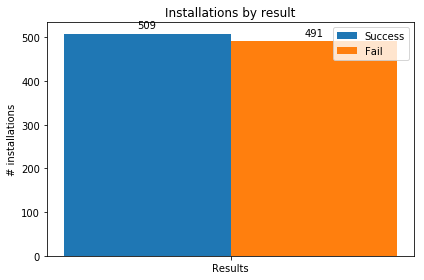

In [9]:
labels = ['Results']

countDF = dp.preprocessedDF3.groupby("Check").count()[["CPU"]]
resultList = list(countDF['CPU'])

nSuccess = [resultList[1]]
nFail = [resultList[0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nSuccess, width, label='Success')
rects2 = ax.bar(x + width/2, nFail, width, label='Fail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# installations')
ax.set_title('Installations by result')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

analyze if exists any correlation with PCA

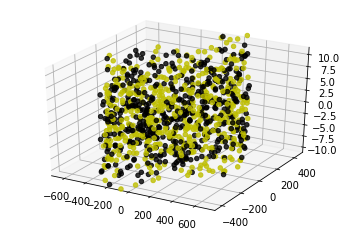

In [10]:
pca = PCA(n_components=3)
X = dp.preprocessedDF3.drop(['envId', 'Check'], axis=1).as_matrix()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = np.where(dp.preprocessedDF3["Check"]==1,'y','k')
ax.scatter(pca_X[:, 0], pca_X[:, 1],  pca_X[:, 2], alpha=0.8, c=colors, marker='o')
ax.axis('equal');
plt.show()

# Training and validation sets

In [11]:
limit = int(N_ROWS * 7.0 / 10.)
X = dp.preprocessedDF3.drop(['envId', 'Check'], axis=1).as_matrix()[:limit]
Y = dp.preprocessedDF3[['Check']].astype(float).as_matrix()[:limit]
Xtest = dp.preprocessedDF3.drop(['envId', 'Check'], axis=1).as_matrix()[limit:]
Ytest = dp.preprocessedDF3[['Check']].astype(float).as_matrix()[limit:]

# logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logisticModel = LogisticRegression()
logisticModel.fit( X, Y )

predictions = logisticModel.predict(Xtest)
score = accuracy_score( Ytest , predictions)
print(score)

0.48


D:\anaconda\envs\TensGPU\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# random forest

https://blog.goodaudience.com/introduction-to-random-forest-algorithm-with-python-9efd1d8f0157

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

RF_model = RandomForestClassifier(**parameters)
RF_model.fit( X, Y)

RF_predictions = RF_model.predict( Xtest )
score = accuracy_score( Ytest ,RF_predictions)
print(score)

0.48


D:\anaconda\envs\TensGPU\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


# svm

In [14]:
from sklearn.svm import SVC  

svclassifier = SVC(kernel='rbf')  
svclassifier.fit( X, Y )  

pred = svclassifier.predict(Xtest) 
score = accuracy_score( Ytest , pred)
print(score)

D:\anaconda\envs\TensGPU\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5066666666666667


# xgboost 

In [15]:
from xgboost import XGBClassifier

xgbModel = XGBClassifier()
xgbModel.fit( X, Y)

y_pred = xgbModel.predict(Xtest)
predictions = [round(value) for value in y_pred]
score = accuracy_score( Ytest , predictions)
print(score)

D:\anaconda\envs\TensGPU\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda\envs\TensGPU\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5033333333333333


D:\anaconda\envs\TensGPU\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Final neural network

model

In [16]:
from keras.models import Sequential
from keras.layers import Dense

nnModel = Sequential()
nnModel.add(Dense(12, input_dim=4, activation='tanh'))
nnModel.add(Dense(8, activation='tanh'))
nnModel.add(Dense(1, activation='sigmoid'))

nnModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


training

In [22]:

def nnTrain( X, Y, epochs=10 ):
    Xnn = prepareNNData( X )
    nnModel.fit( Xnn, Y, epochs=epochs )
    
def nnPredict( X ):
    Xnn = prepareNNData( X )
    return nnModel.predict( Xnn )
    
def prepareNNData( X ):
    predLR = logisticModel.predict( X )
    predRF = RF_model.predict( X )
    predSVM = svclassifier.predict( X ) 
    predXGB = xgbModel.predict( X )
    return np.column_stack( ( predLR, predRF, predSVM, predXGB ) )
    
    

In [18]:
nnTrain( X , Y, 50 )

D:\anaconda\envs\TensGPU\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Epoch 1/50
700/700 [==============================] - 1s 772us/step - loss: 0.5547 - acc: 0.6614
Epoch 2/50
700/700 [==============================] - 0s 33us/step - loss: 0.4712 - acc: 0.7971
Epoch 3/50
700/700 [==============================] - 0s 37us/step - loss: 0.3961 - acc: 0.9600
Epoch 4/50
700/700 [==============================] - 0s 38us/step - loss: 0.3234 - acc: 0.9986
Epoch 5/50
700/700 [==============================] - 0s 40us/step - loss: 0.2584 - acc: 0.9986
Epoch 6/50
700/700 [==============================] - 0s 42us/step - loss: 0.2051 - acc: 0.9986
Epoch 7/50
700/700 [==============================] - 0s 39us/step - loss: 0.1624 - acc: 0.9986
Epoch 8/50
700/700 [==============================] - 0s 37us/step - loss: 0.1299 - acc: 0.9986
Epoch 9/50
700/700 [==============================] - 0s 42us/step - loss: 0.1055 - acc: 0.9986
Epoch 10/50
700/700 [==============================] - 0s 43us/step - loss: 0.0869 - acc: 0.9986
Epoch 11/50
700/700 [=================

test accuracy

In [23]:
preds = nnPredict( Xtest )
predictions = [round(value[0]) for value in preds]
score = accuracy_score( Ytest , predictions)
print(score)

0.5066666666666667


D:\anaconda\envs\TensGPU\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
